# GSV Spatiotemporal Analysis
In this project, we aim to analyze spatio-temporal patterns in Google Street View drivethroughs across the world such as:

- What areas of the world are most frequently updated and why might this be (look at density patterns, socio-economics, etc.)
- What areas of the world have been most recently updated
- Where street view imagery doesn't exist at all

## Some useful geospatial analysis links

- [Creating Mapbox Choropleth Maps in Python with Plotly](https://plotly.com/python/mapbox-county-choropleth/), Plotly
- [Simplest Way to Create a Choropleth Map by US States in Python](https://towardsdatascience.com/simplest-way-of-creating-a-choropleth-map-by-u-s-states-in-python-f359ada7735e), Medium article by Sharone Li
- [Three Ways to Plot Choropleth Map using Python](https://medium.com/geekculture/three-ways-to-plot-choropleth-map-using-python-f53799a3e623), Medium article by Burger Wu
- [Geographic Data Science with Python](https://geographicdata.science/book/intro.html), a book by Sergio J. Rey, Dani Arribas-Bel, and Levi J. Wolf


## Related Work
- Curtis, J.W., Curtis, A., Mapes, J. et al. Using google street view for systematic observation of the built environment: analysis of spatio-temporal instability of imagery dates. Int J Health Geogr 12, 53 (2013). https://doi.org/10.1186/1476-072X-12-53

- Fry, D., Mooney, S.J., Rodríguez, D.A. et al. Assessing Google Street View Image Availability in Latin American Cities. J Urban Health 97, 552–560 (2020). https://doi.org/10.1007/s11524-019-00408-7

- Cara M. Smith, Joel D. Kaufman, Stephen J. Mooney, Google street view image availability in the Bronx and San Diego, 2007–2020: Understanding potential biases in virtual audits of urban built environments, Health & Place, Volume 72, 2021, 102701, ISSN 1353-8292, https://doi.org/10.1016/j.healthplace.2021.102701

In [14]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [25]:
gsv_capture_dates_file_with_path = 'data/la-piedad_gsv_capture_dates.csv'
df_raw = pd.read_csv(gsv_capture_dates_file_with_path)
print(df_raw.shape)

(24368, 7)


In [27]:
df_raw.head()

,pano_id,lat,lng,date,copyright,street_edge_id,region_id
0,G4xr3I2AJg0RcGGxil2bug,20.343570,-102.041835,2019-06,© Google,676,20 de Noviembre
1,kFTZNseiM7lWmg8efP7A3g,20.343759,-102.041800,2019-06,© Google,676,20 de Noviembre
2,TI9B3Dv9T0yHc94XtCTgTA,20.343907,-102.041778,2019-06,© Google,676,20 de Noviembre
3,G4xr3I2AJg0RcGGxil2bug,20.343570,-102.041835,2019-06,© Google,676,20 de Noviembre
4,kFTZNseiM7lWmg8efP7A3g,20.343759,-102.041800,2019-06,© Google,676,20 de Noviembre


In [89]:
print("Before filtering:", df_raw.shape)
df = df_raw[df_raw['lat'] < 35] # filter out tutorial panos from DC
print("After removing DC tutorial panos:", df.shape)
df = df.drop_duplicates(subset=["pano_id"], keep='first')
print("After removing pano id duplicates:", df.shape)

# sort by date (so newest points are on top)
df.sort_values(by=['date'], inplace=True)
df.head()

Before filtering: (24368, 7)
After removing DC tutorial panos: (24364, 7)
After removing pano id duplicates: (11796, 7)


,pano_id,lat,lng,date,copyright,street_edge_id,region_id
11283,fdT7-SHZ_h963Hqkf1DvjQ,20.353358,-102.049954,2008-12,© Google,116,JARDINES DEL CERRO GRANDE
23204,6LmAiSjgbUjG39IdNJCKqw,20.349077,-102.034565,2008-12,© Google,2224,TRES ESTRELLAS
18719,hW_FswLx9-hGkXAgaKPdtA,20.351037,-102.059834,2009-07,© Google,2950,LÁZARO CÁRDENAS
19041,r3oJgKT2XZzE3wOMO1Uhkg,20.355340,-102.057762,2009-07,© Google,4124,LÁZARO CÁRDENAS
19043,QC1Audm32863G6WBscsdkQ,20.355196,-102.057814,2009-07,© Google,4125,LÁZARO CÁRDENAS


In [85]:
# Count rows 
print("Total panos:", len(df))
print("Num panos after 2007-01-01:", len(df[(df['date'] > '2007-01-01')]))
print("Num panos after 2010-01-01:", len(df[(df['date'] > '2010-01-01')]))
print("Num panos after 2017-01-01:", len(df[(df['date'] > '2017-01-01')]))
print("Num panos after 2018-01-01:", len(df[(df['date'] > '2018-01-01')]))
print("Num panos after 2019-01-01:", len(df[(df['date'] > '2019-01-01')]))
print("Num panos after 2020-01-01:", len(df[(df['date'] > '2020-01-01')]))
print("Num panos after 2021-01-01:", len(df[(df['date'] > '2021-01-01')]))
print("Num panos after 2022-01-01:", len(df[(df['date'] > '2022-01-01')]))


Total panos: 11796
Num panos after 2007-01-01: 11795
Num panos after 2010-01-01: 5299
Num panos after 2017-01-01: 5095
Num panos after 2018-01-01: 5078
Num panos after 2019-01-01: 5034
Num panos after 2020-01-01: 626
Num panos after 2021-01-01: 626
Num panos after 2022-01-01: 0


In [72]:
panoPoints = [Point(xy) for xy in zip(df.lng, df.lat)]

In [88]:
geo_df = gpd.GeoDataFrame(df, geometry=panoPoints) 
geo_df.crs = {'init':"epsg:4326"}

<AxesSubplot:>

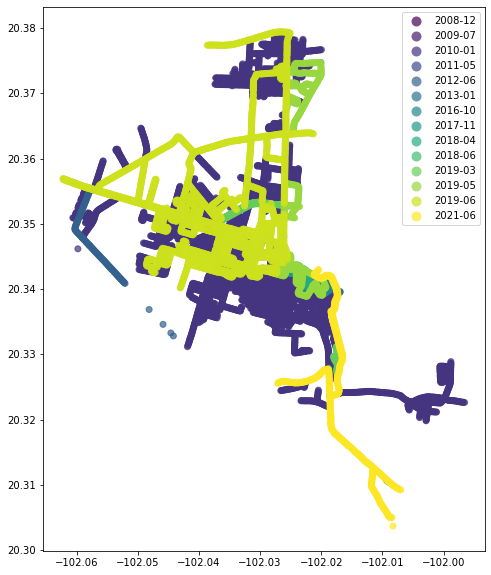

In [86]:
geo_df.plot(figsize=(10, 10), column='date', cmap='viridis', alpha=0.7, legend=True)